In [1]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from math import*
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
N=20
ec=1.6e-19
h=(6.62e-34)/2*np.pi
w_c=2*np.pi*1.5e-3*ec/(6.62e-34)
w_a=2*np.pi*1.5e-3*ec/(6.62e-34)
w_p=2*np.pi*1.5e-3*ec/(6.62e-34)
g=(1*2*np.pi*(ec*1e-3)/(6.62e-34))
kappa=0.0085e-12/h
gamma=0.001e-12/h
alpha=0.75*np.pi
t_drive=np.array([0.1e-12,1.42e-11,2.41e-11,3.46e-11,4e-11,4.65e-11,5.37e-11,6.07e-11,6.72e-11,7.21e-11])
#print(t_drive)
sig=1e-13/2.355 
#print(sig)
tlist=[]

t=0.0

while t<=50:
    #o=round(t,)
    o=round(t,2)
    o=o*(1e-12)
    tlist.append(float("%.14f"%o))
    t=t+0.01
tlist=np.array(tlist)

In [3]:
output=qload('project-1-part-2')

In [4]:
result=qload('project-1-part-2 wigner dissipation')

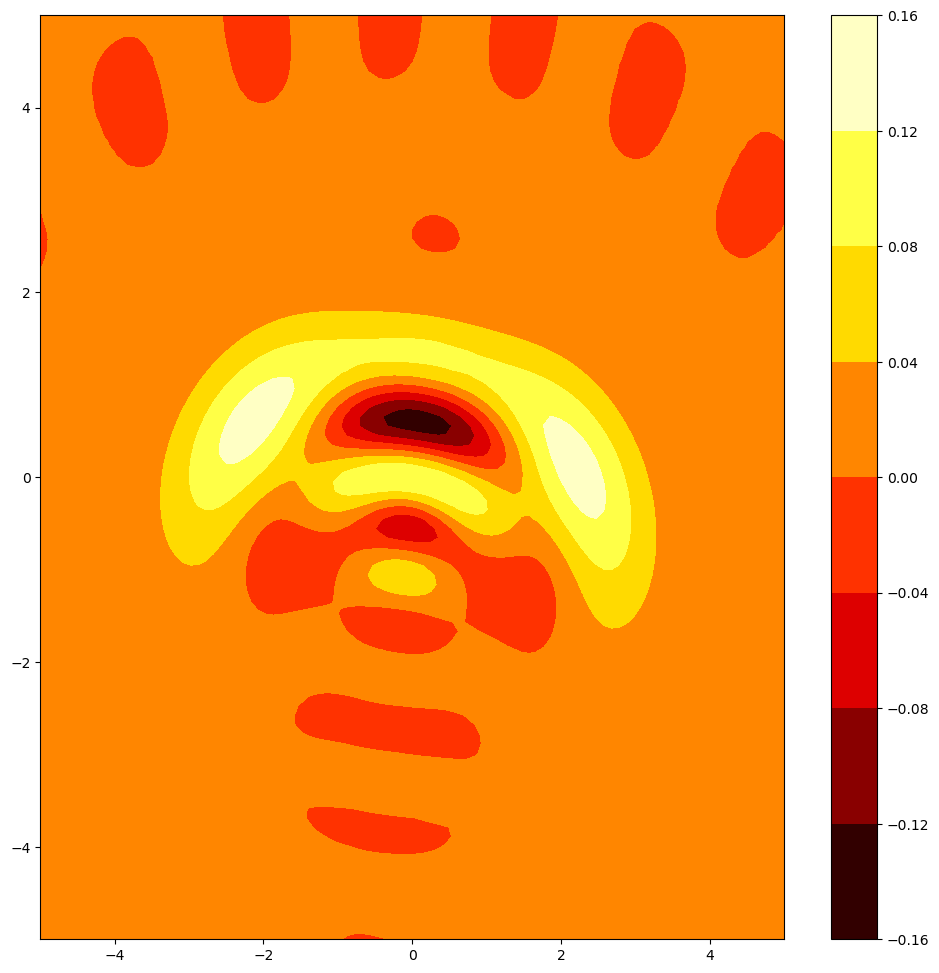

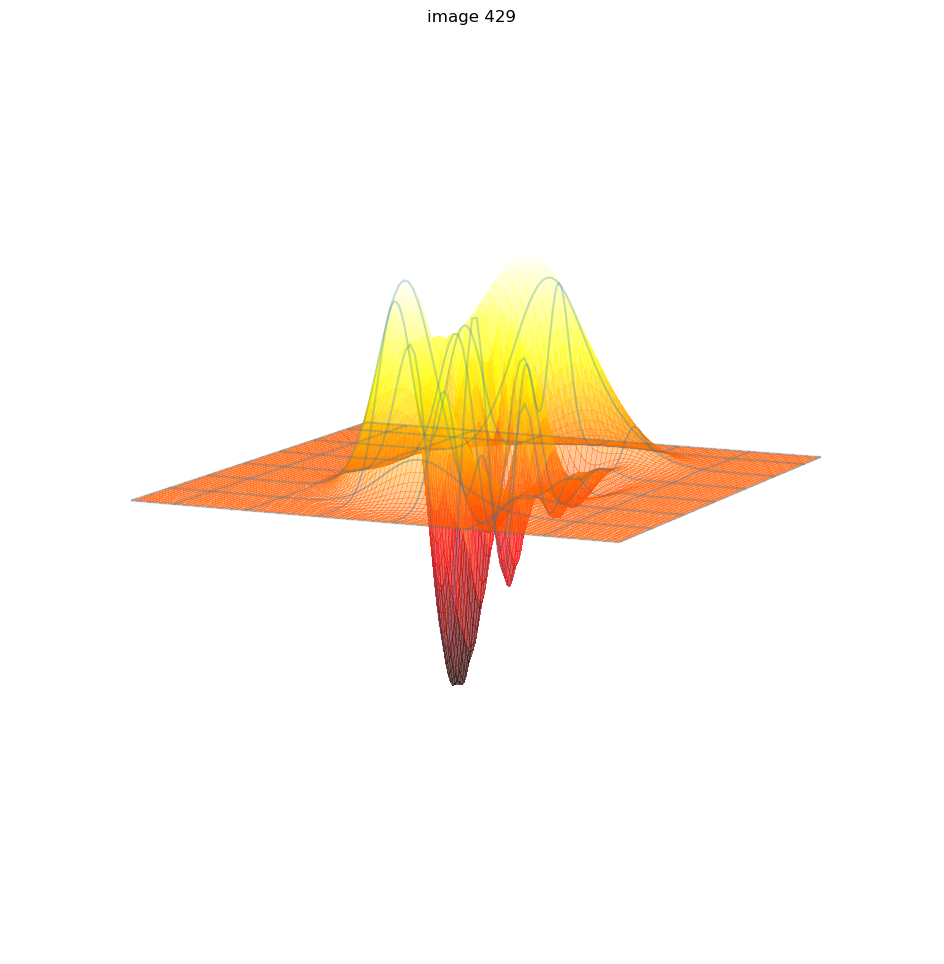

In [6]:
def wigner_plot_steadystate(rho,xvec,i):
    
    rho_cavity=ptrace(rho,0)
    W=wigner(rho_cavity,xvec,xvec)
    wlim=abs(W).max()
    fig=plt.figure(figsize=(12,12),facecolor='none')
    axes1=fig.add_subplot(111)
    plot1=axes1.contourf(xvec,xvec,W,cmap=cm.hot)
    plt.colorbar(plot1)
    xvec=np.linspace(-2,2,100)
    X,Y=np.meshgrid(xvec,xvec)
    plt.savefig(f"1_1_ideal_wig_contour{i}.png", dpi=1200)
    fig2=plt.figure(figsize=(12,12),facecolor='none')
    axes1=fig2.add_subplot(111,projection='3d')
    
    dia=axes1.plot_surface(X,Y,W,rstride=1,cstride=1,antialiased=False,cmap='hot',alpha=0.40)
    dia=axes1.plot_wireframe(X,Y,W,rstride=15,cstride=15,antialiased=True,cmap='hot',alpha=.25)
    
    axes1.view_init(10,205)
    plt.title(f"image {i}")
    axes1.set_xlabel(r"Im $\alpha$")
    axes1.set_ylabel(r"Re $\alpha$")
    axes1.axis('off')
    plt.savefig(f"1_1_ideal_wig_3D{i}.png", dpi=1200)
    #fig.savefig(os.path.join(save_path, f"image_{i}.png"))
    #axes2=fig.add_subplot(1,2,2)
    #plot1=axes2.bar(np.arange(N),np.real(rho_cavity.diag()))
    #axes2.set_xlabel('Fock number')
    #axes2.set_ylabel("Occupation probability")
    
xvec=np.linspace(-5,5,100)
X,Y=np.meshgrid(xvec,xvec)

for i in range(429,430,1):
    
    wigner_plot_steadystate(result.states[i],xvec,i)
